In [ ]:
# RUN THIS CELL BEFORE STARTING
import matplotlib.pyplot as plt
import numpy as np
import math

# Task 2a

In [ ]:
# Material Data for Titanium
thermal_conductivity = 30.45 # [J/(m*s*K)]
mass_density = 4002.23 # [kg/m^3]
specific_heat = 857.68 # [J/(kg*K)]
thermal_diffusivity = thermal_conductivity/(mass_density*specific_heat)#(m**2/s)

melting_temperature = 1654 # Melting Temperature deg_C

In [ ]:
def rosenthal(x, y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity):
  R = (x**2+y**2+z**2)**0.5
  T = T0 +  (Q/(2*math.pi*thermal_conductivity *R +1e-12)
  # The term 1e-12 avoids dividing by zero when R=0
    * np.exp(-v*(x+R)/(2*thermal_diffusivity))) 
  # Using np.exp instead of math.exp allows us to pass numpy-arrays as inputs 
  return T

In [ ]:
Q = 1e3 # Energy in W
v = 40e-2/60 # Torch speed in m/s, converted from cm/min
T0 = 25 # Preheat in deg_C

x = 2e-3; y = 0; z = 0
T = rosenthal(x, y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
print(f'Temperature at ({x*1e3}mm,{y*1e3}mm,{z*1e3}mm): {T:.2f}°C')

x = 0; y = 0; z = -3e-3
T = rosenthal(x, y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
print(f'Temperature at ({x*1e3}mm,{y*1e3}mm,{z*1e3}mm): {T:.2f}°C')

x = -1e-3; y = 0; z = 0
T = rosenthal(x, y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
print(f'Temperature at ({x*1e3}mm,{y*1e3}mm,{z*1e3}mm): {T:.2f}°C')

Temperature at (2.0mm,0.0mm,0.0mm): 606.34°C
Temperature at (0.0mm,0.0mm,-3.0mm): 589.33°C
Temperature at (-1.0mm,0.0mm,0.0mm): 5251.76°C


# Task 2c

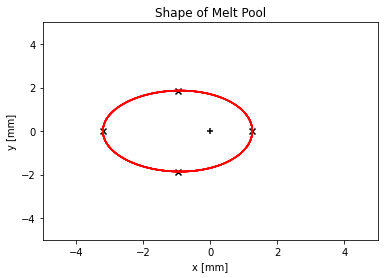

The melt pool goes from -3.21mm to 1.25mm in x-direction
The length of the melt pool is 4.46mm
The melt pool goes from -1.86mm to 1.86mm in y-direction
The width of the melt pool is 3.72mm


In [ ]:
Q = 1e3 # Energy in W
v = 40e-2/60 # Torch speed in m/s
T0 = 25 # Preheat in deg_C
x = np.linspace(-5e-3, 5e-3, 10000)
y = np.linspace(-5e-3, 5e-3, 10000)
z = 0

X, Y = np.meshgrid(x, y)

T = rosenthal(X, Y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
is_melted = T > melting_temperature

y_melt, x_melt = np.where(is_melted)
x_max = x[x_melt.max()]
x_min = x[x_melt.min()]

y_min = y[y_melt.min()]
y_max = y[y_melt.max()]

x_edge_min = x[x_melt[y_melt.argmin()]]
x_edge_max = x[x_melt[y_melt.argmax()]]

plt.contour(X*1e3, Y*1e3, is_melted, colors='red') # Displays the contour of the melt pool
plt.scatter(0, 0, color='black', marker='+') # Displays the position of the heat source
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Shape of Melt Pool')

plt.scatter(x_max*1e3, 0, color='black', marker='x')
plt.scatter(x_min*1e3, 0, color='black', marker='x')
plt.scatter(x_edge_min*1e3, y_min*1e3, color='black', marker='x')
plt.scatter(x_edge_max*1e3, y_max*1e3, color='black', marker='x')

plt.show()

print(f'The melt pool goes from {x_min*1e3:.2f}mm to {x_max*1e3:.2f}mm in x-direction')
length = x_max - x_min
print(f'The length of the melt pool is {length*1e3:.2f}mm')
print(f'The melt pool goes from {y_min*1e3:.2f}mm to {y_max*1e3:.2f}mm in y-direction')
width = y_max - y_min
print(f'The width of the melt pool is {width*1e3:.2f}mm')

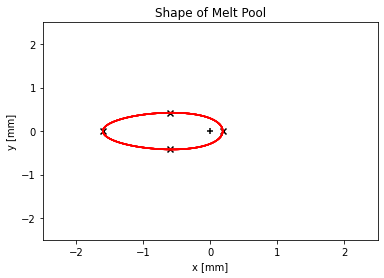

The melt pool goes from -1.60mm to 0.18mm in x-direction
The length of the melt pool is 1.79mm
The melt pool goes from -0.42mm to 0.42mm in y-direction
The width of the melt pool is 0.84mm


In [ ]:
Q = 500 # Energy in W
v = 104e-3 # Torch speed in m/s
T0 = 25 # Preheat in deg_C
x = np.linspace(-2.5e-3, 2.5e-3, 10000)
y = np.linspace(-2.5e-3, 2.5e-3, 10000)
z = 0

X, Y = np.meshgrid(x, y)

T = rosenthal(X, Y, z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
is_melted = T > melting_temperature

y_melt, x_melt = np.where(is_melted)
x_max = x[x_melt.max()]
x_min = x[x_melt.min()]

y_min = y[y_melt.min()]
y_max = y[y_melt.max()]

x_edge_min = x[x_melt[y_melt.argmin()]]
x_edge_max = x[x_melt[y_melt.argmax()]]

plt.contour(X*1e3, Y*1e3, is_melted, colors='red') # Displays the contour of the melt pool
plt.scatter(0, 0, color='black', marker='+') # Displays the position of the heat source
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Shape of Melt Pool')

plt.scatter(x_max*1e3, 0, color='black', marker='x')
plt.scatter(x_min*1e3, 0, color='black', marker='x')
plt.scatter(x_edge_min*1e3, y_min*1e3, color='black', marker='x')
plt.scatter(x_edge_max*1e3, y_max*1e3, color='black', marker='x')

plt.show()

print(f'The melt pool goes from {x_min*1e3:.2f}mm to {x_max*1e3:.2f}mm in x-direction')
length = x_max - x_min
print(f'The length of the melt pool is {length*1e3:.2f}mm')
print(f'The melt pool goes from {y_min*1e3:.2f}mm to {y_max*1e3:.2f}mm in y-direction')
width = y_max - y_min
print(f'The width of the melt pool is {width*1e3:.2f}mm')                

# Task 3.3
The formulas below allow you to calculate the thermal gradient and the solidification rate for a heat field resulting from the Rosenthal equation. You can plot the resulting values in the diagramm below, using plt.scatter(). \\
We suggest the following approach:
* Use Rosenthal equation to (numerically) find the positions of both the deepest point in the melt pool and the trailing edge of the melt pool.
* Verify your result by calculating the temperature at these positions.
* Calculate both the thermal gradient and the solidification rate at these positions, using the provided formulas.
* Plot the resulting values in the diagramm below.


In [ ]:
def thermal_gradient(x, y, z, v, lmbda, alpha, Q, T0):
    '''
    Arguments:
    x, y, z: position [m], given as numpy-array or single number
    v: velocity of heat source [m/s]
    Q: deposited energy of heat source [W]
    T0: initial temperature of material [K]
    lmbda: thermal conductivity of material [J/(m*s*K)]
    alpha: thermal diffusivity of material [m**2/s]
    
    Returns:
    G: Thermal gradient [K/m], given in the same format as input positions
    '''
    # Normalize the coordinates
    x = v / (2*alpha) * x
    y = v / (2*alpha) * y
    z = v / (2*alpha) * z

    R = np.sqrt(x**2 + y**2 + z**2)
    dT_dx = -np.exp(-(x+R)) / (2*R) * (1 + x/R + x/R**2)  
    dT_dy = -y*np.exp(-(x+R)) / (2*R**2) * (1 + 1/R)
    dT_dz = -z*np.exp(-(x+R)) / (2*R**2) * (1 + 1/R)
    
    G = np.sqrt(dT_dx**2 + dT_dy**2 + dT_dz**2)
    # Denormalize the Thermal Gradient
    G = G * (v/(2*alpha))**2 * (Q/(math.pi*lmbda))
    
    return G

In [ ]:
def solidification_rate(x, y, z, v, lmbda, alpha, Q, T0):
    '''
    Arguments:
    x, y, z: position [m], given as numpy-array or single number
    v: velocity of heat source [m/s]
    Q: deposited energy of heat source [W]
    T0: initial temperature of material [K]
    lmbda: thermal conductivity of material [J/(m*s*K)]
    alpha: thermal diffusivity of material [m**2/s]
    
    Returns:
    solidification rate:  [m/s], given in the same format as input positions
    '''
    # Normalize the coordinates
    x_n = v / (2*alpha) * x
    y_n = v / (2*alpha) * y
    z_n = v / (2*alpha) * z
    
    R = np.sqrt(x_n**2 + y_n**2 + z_n**2)
    dT_dt = np.exp(-(x_n+R)) / (2*R) * (1 + x_n/R + x_n/R**2)
    # Dimensionalize the cooling rate
    dT_dt *= (v/(2*alpha))**2 * (Q*v/(math.pi*lmbda))
    G = thermal_gradient(x, y, z, v, lmbda, alpha, Q, T0)
    solidification_rate = -dT_dt/(G+1e-6)
    
    return solidification_rate

# WAAM
Find the coordinates of the surface part of the trailing edge and of the deepest point of the melt pool. Plot the melt pool to double check.

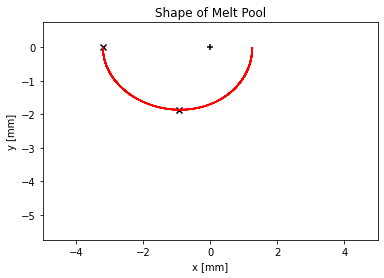

In [ ]:
Q = 1e3 # Energy in W
v = 40e-2/60 # Torch speed in m/s
T0 = 25 # Preheat in deg_C
x = np.linspace(-5e-3, 5e-3, 10000)
y = 0
z = np.linspace(-5e-3, 0, 10000)

X, Z = np.meshgrid(x, z)

T = rosenthal(X, y, Z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
is_melted = T > melting_temperature

z_melt, x_melt = np.where(is_melted)
x_top = x[x_melt.min()]
z_top = 0

z_bottom = z[z_melt.min()]
x_bottom = x[x_melt[z_melt.argmin()]]

plt.contour(X*1e3, Z*1e3, is_melted, colors='red') # Displays the contour of the melt pool
plt.scatter(0, 0, color='black', marker='+') # Displays the position of the heat source
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Shape of Melt Pool')
plt.axis('equal')

plt.scatter(x_top*1e3, z_top*1e3, color='black', marker='x')
plt.scatter(x_bottom*1e3, z_bottom*1e3, color='black', marker='x')

plt.show()

Find the values of the thermal gradient (G) and the solidification rate (SR) and plot them in the diagram. Take care of units!

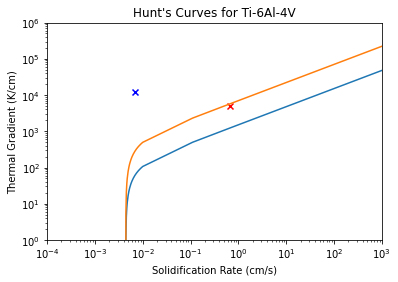

In [ ]:
R_val = np.concatenate((np.arange(0.00045, 0.01-0.0001, 0.0001), np.arange(0.01, 1-0.1, 0.1), np.arange(1, 1000, 10)))
G_eq = 1509.65 * R_val**0.5 * (1-2.9348e-4 * R_val**(-3/2.))
G_col = 7006.9 * R_val**0.5 * (1 - 2.9348e-4 * R_val**(-3/2))
plt.loglog(R_val, G_eq)
plt.loglog(R_val, G_col)

plt.xlim(1e-4, 1e3)
plt.ylim(1e0, 1e6)
plt.xlabel('Solidification Rate (cm/s)')
plt.ylabel('Thermal Gradient (K/cm)')

g_top = thermal_gradient(x_top, 0, z_top, v, thermal_conductivity, thermal_diffusivity, Q, T0)
sr_top = solidification_rate(x_top, 0, z_top, v, thermal_conductivity, thermal_diffusivity, Q, T0)
g_bottom = thermal_gradient(x_bottom, 0, z_bottom, v, thermal_conductivity, thermal_diffusivity, Q, T0)
sr_bottom = solidification_rate(x_bottom, 0, z_bottom, v, thermal_conductivity, thermal_diffusivity, Q, T0)

# Plot your values using plt.scatter, simply replace (and duplicate) the line
# below. You can use the optional inputs 'color' and 'marker' to change the
# scatter point's color and shape. Check the online documentation for more
# details: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(sr_top*100, g_top/100, color='red', marker='x')
plt.scatter(sr_bottom*100, g_bottom/100, color='blue', marker='x')

plt.title('Hunt\'s Curves for Ti-6Al-4V')
plt.show()

There is pure columnar grain growth at the bottom of the melt pool and mixed growth at the top.

# EBAM
Rerun the code with different input parameters

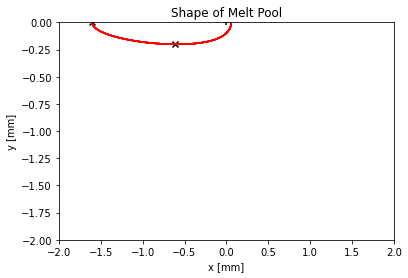

In [ ]:
Q = 500 # Energy in W
v = 50e-2 # Torch speed in m/s
T0 = 25 # Preheat in deg_C
x = np.linspace(-2e-3, 2e-3, 10000)
y = 0
z = np.linspace(-1e-3, 0, 10000)

X, Z = np.meshgrid(x, z)

T = rosenthal(X, y, Z, Q, v, T0, thermal_diffusivity, thermal_conductivity)
is_melted = T > melting_temperature

z_melt, x_melt = np.where(is_melted)
x_top = x[x_melt.min()]
z_top = 0

z_bottom = z[z_melt.min()]
x_bottom = x[x_melt[z_melt.argmin()]]

plt.contour(X*1e3, Z*1e3, is_melted, colors='red') # Displays the contour of the melt pool
plt.scatter(0, 0, color='black', marker='+') # Displays the position of the heat source
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('Shape of Melt Pool')

plt.scatter(x_top*1e3, z_top*1e3, color='black', marker='x')
plt.scatter(x_bottom*1e3, z_bottom*1e3, color='black', marker='x')

plt.show()

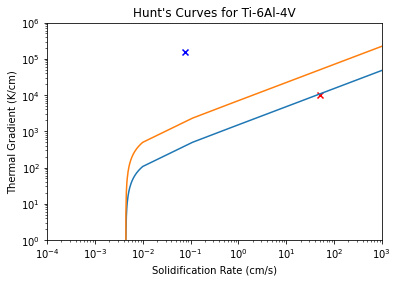

In [ ]:
R_val = np.concatenate((np.arange(0.00045, 0.01-0.0001, 0.0001), np.arange(0.01, 1-0.1, 0.1), np.arange(1, 1000, 10)))
G_eq = 1509.65 * R_val**0.5 * (1-2.9348e-4 * R_val**(-3/2.))
G_col = 7006.9 * R_val**0.5 * (1 - 2.9348e-4 * R_val**(-3/2))
plt.loglog(R_val, G_eq)
plt.loglog(R_val, G_col)

plt.xlim(1e-4, 1e3)
plt.ylim(1e0, 1e6)
plt.xlabel('Solidification Rate (cm/s)')
plt.ylabel('Thermal Gradient (K/cm)')

g_top = thermal_gradient(x_top, 0, z_top, v, thermal_conductivity, thermal_diffusivity, Q, T0)
sr_top = solidification_rate(x_top, 0, z_top, v, thermal_conductivity, thermal_diffusivity, Q, T0)
g_bottom = thermal_gradient(x_bottom, 0, z_bottom, v, thermal_conductivity, thermal_diffusivity, Q, T0)
sr_bottom = solidification_rate(x_bottom, 0, z_bottom, v, thermal_conductivity, thermal_diffusivity, Q, T0)

# Plot your values using plt.scatter, simply replace (and duplicate) the line
# below. You can use the optional inputs 'color' and 'marker' to change the
# scatter point's color and shape. Check the online documentation for more
# details: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(sr_top*100, g_top/100, color='red', marker='x')
plt.scatter(sr_bottom*100, g_bottom/100, color='blue', marker='x')

plt.title('Hunt\'s Curves for Ti-6Al-4V')
plt.show()

The bottom of the melt pool has columnar grain growth, while the top shows completely equiaxed growth.
Note that even with these extreme parameters (the electron beam needs to be moving at half a meter every second), we barely manage to create equiaxed grain growth at the top of the melt pool.